## Practice Project Three - Sonar Rock Vs Mines Prediction

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns


load the csv file

In [2]:
pd.read_csv('sonar.all-data.csv')

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


1. This data has no headers and There are 207 observations with 61 columns, and the last column is the data we wish to predict.

In [3]:
main_df = pd.read_csv('sonar.all-data.csv',header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


The last column have values for "R" and "M", wich stands for "Rock" or "Mine" observation.

We will try to predict it based on the columns from 0 to 59 while the column 60 says if its a "Rock" or "Mine" observation.


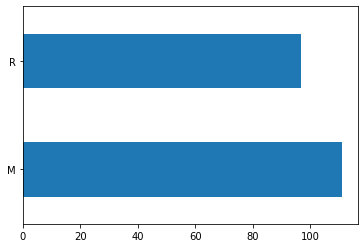

In [4]:
main_df[60].value_counts().plot(kind='barh')

Proportions of rock and mine is almost the same.

 we will use 59 columns for input and column 60 as target data.

In [5]:
inputs_df = main_df.drop(60, axis=1)
inputs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


converts the Categorical values into numerical dummy values using get_dummies

In [6]:
targets_df = pd.get_dummies(main_df[60])
targets_df

,M,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


For the targets we have now the columns 'R' wich stand for Rock and 'M' for Mine.

For these columns we have the values 1 for "belongs to" and 0 for "doesn't belongs to" the column class.


In [7]:
rock_y_df = targets_df['R']
mine_y_df = targets_df['M']

Now i will split Train_test data
I choose to Predict 1 it its ROCK and 0 if its MINE

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_df, rock_y_df, test_size=0.30, random_state=42)

We will use PolynomialFeatures for feature creation as we are dealing with numerical data.

Then we will use Pipeline with the PolynomialFeatures and the classifier we choose for prediction.


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
#Feature Creation
poly = PolynomialFeatures(2)

We will import some sklearn classifiers, test them and select the best one to use in our problem.

In [10]:
#Importing classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

Time to declare our classification models for testing and then choose the one with better generalization.

In [11]:
classifiers_ = [
    ("Decision Tree", DecisionTreeClassifier(max_depth=8)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Linear SVM", SVC(kernel="linear", C=0.025,probability=True)),
    ("Naive Bayes",GaussianNB()),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("Nearest Neighbors",KNeighborsClassifier(3)),
    ("AdaBoost",AdaBoostClassifier()),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True)),
    ("SGDClassifier", SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet'))
    ]

Train each Classifier to take its training results.

In [12]:
clf_names = []
train_scores = []
test_scores = []
for n,clf in classifiers_:
    clf_names.append(n)
    
    # Pipelineing model
    clf = Pipeline([('POLY', poly),('CLF',clf)])
    
    # Model training
    clf.fit(X_train, y_train)
    print(n+" training done!")
    # Measure training score
    train_scores.append(clf.score(X_train, y_train))
    
    # Measure test score
    test_scores.append(clf.score(X_test, y_test))

Decision Tree training done!
Gaussian Process training done!
Linear SVM training done!
Naive Bayes training done!
Random Forest training done!
Nearest Neighbors training done!
AdaBoost training done!
RBF SVM training done!
SGDClassifier training done!


We can plot each one results for comparing.

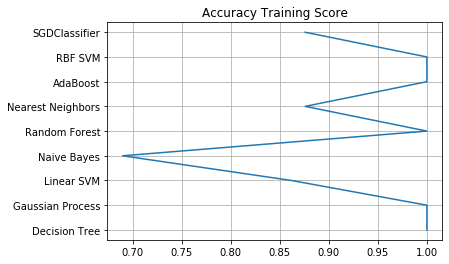

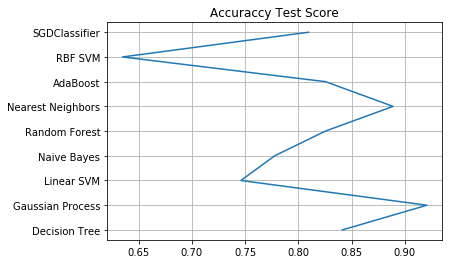

In [13]:
#Plot results
plt.title('Accuracy Training Score')
plt.grid()
plt.plot(train_scores,clf_names)
plt.show()

plt.title('Accuraccy Test Score')
plt.grid()
plt.plot(test_scores,clf_names)
plt.show()

From the 9 classifiers we used, 5 got overfitting with 100% accuracy on the train data, but the test score shows us that only a few of them was able to generalize the problem.

As seen in the Test Score results, the Gaussian Process shows better generalization, followed by the methods of Nearest Neighbor, Stochastic Gradient Decent, decision Tree and so on.

We will then train a model using Gaussian Process method together with Polynomial Features as it shows better results for this experiment.

In [14]:
rng = np.random.RandomState(1)

clf = GaussianProcessClassifier(1.0 * RBF(1.0))

clf = Pipeline([('POLY', poly),
                ('Gaussian Process', clf)])

# Training our model
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('POLY',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Gaussian Process',
                 GaussianProcessClassifier(copy_X_train=True,
                                           kernel=1**2 * RBF(length_scale=1),
                                           max_iter_predict=100,
                                           multi_class='one_vs_rest',
                                           n_jobs=None, n_restarts_optimizer=0,
                                           optimizer='fmin_l_bfgs_b',
                                           random_state=None,
                                           warm_start=False))],
         verbose=False)

Measure its performance on the training set.

In [15]:
clf.score(X_train, y_train)

1.0

It shows a kind of overfitting, where its high complexity makes it fit the the whole training dataset.

It can become a problem depending on the context that you're dealing with, but first lets check its score on the test dataset.

In [16]:
clf.score(X_test, y_test)

0.9206349206349206

The accuraccy of 92% on the test dataset shows that the model was able to generalize well for the task of classifying if the observation is a rock or a mine.

Lets count how much Rock our classifier points in the test dataset.

In [17]:
clf.predict(X_test).sum()

25

VS. how many ROCK there really are in dataset

In [18]:
y_test.sum()

28


For better conclusions we plot confusion matrix for better describing our model accuracy on both: train and test data.

Train results: confusion matrix
[[76  0]
 [ 0 69]]


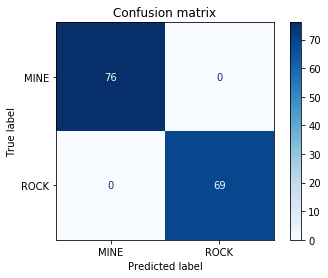

In [19]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_train, y_train,
                             display_labels=['MINE','ROCK'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

The training dataset confusion matrix shows that it has 100% accuray, correct classifying each observation.

We must then take measurements on the confusion matrix of the test data:

Test results: confusion matrix
[[34  1]
 [ 4 24]]


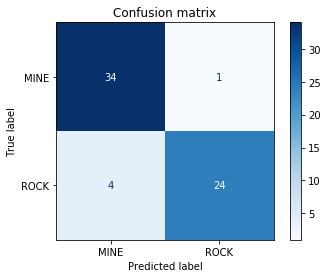

In [20]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['MINE','ROCK'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Test results: confusion matrix')
print(disp.confusion_matrix)

Our model wrong predicted some samples on the test dataset.